In [ ]:
import torch
import torchvision
from  torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torchvision.transforms as transforms # In order to transform the dataset into tensors


In [ ]:
#Importing the dataset

In [ ]:
dataset= CIFAR10(root='data',download=True)

Files already downloaded and verified


In [ ]:
len(dataset)

50000

In [ ]:
test_dataset= CIFAR10(root='data',download=True, train=False, transform=transforms.Compose([
    transforms.Grayscale(1),
    transforms.ToTensor()])
)
len(test_dataset)

Files already downloaded and verified


10000

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9A6DB54F70>, 6)
Label 6


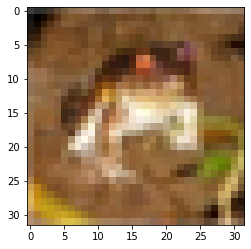

In [ ]:
#dataset[0] will give a tuple of image and its label.
print(dataset[0])
image,label = dataset[0]
plt.imshow(image)
print('Label',label)

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9A6DBACD30>, 4)
Label 4


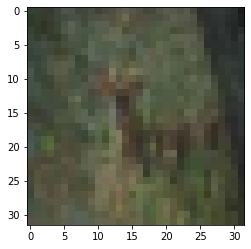

In [ ]:
print(dataset[10])
image,label = dataset[10]
plt.imshow(image,cmap='gray')
print('Label',label)

In [ ]:
# transforming the images into the tensors
train_dataset = CIFAR10(root='data/',download=True, train=True, transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.ToTensor()]))

Files already downloaded and verified


In [ ]:
len(train_dataset)

50000

In [ ]:
img, label = train_dataset[0]
print(img.shape, label)

torch.Size([1, 32, 32]) 6


In [ ]:
print(train_dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, drop_last=True,shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32,drop_last=True, shuffle=True)

In [ ]:
# #Calculate accuracy
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item()
#   acc= (correct/len(y_pred))*100
#   return acc

In [ ]:
#building a multiclass classification model
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 3layer Sigmoid activaton function

In [ ]:
from torch import nn
#building a multiclass classification model
class CifarModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    x=x.reshape(-1,1024)
    return self.linear_layer_stack(x)

  #create an instance of model and send it to the target device
model_0= CifarModel(input_features=1024,
                   output_features=10,
                   hidden_units=100).to(device)
model_0


CifarModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1024, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
#create a loss function and an optimizer for multi-class classification model
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


# Training the Model

In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=50
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

#loop through data
for epoch in range(epochs):
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X_train, y_train =X.to(device), y.to(device)
    #training
    model_0.train()

    #1. forward pass
    y_logits = model_0(X)

    #2.Calculate the loss/acc
    loss = loss_fn(y_logits, y)
    # acc = accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

    train_loss = train_loss + loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step(gradient descent)
    optimizer.step()

  
  ##Testing
  model_0.eval()
  with torch.inference_mode():
    test_loss = 0
    for X, y in test_dataloader:
      X_test, y_test =X.to(device), y.to(device)
    #1. forward pass
      test_logits = model_0(X)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      #2. calculte the loss
      test_loss = test_loss + loss_fn(test_logits, y)

      
      # test_acc= accuracy_fn(y_true=y,
      #                      y_pred=test_logits.argmax(dim=1))
    
  #print out whats hapening
  train_loss = train_loss / len(train_dataloader)
  test_loss = test_loss / len(test_dataloader)
  if epoch%2 ==0 :
   epoch_count.append(epoch)
   #add train loss to the list
   train_loss_list.append(train_loss)
   #add test loss to the list
   test_loss_list.append(test_loss)

  print(f"Epoch: {epoch} |train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} ")
  




Epoch: 0 |train loss:2.26363 | Test loss:2.18222 
Epoch: 1 |train loss:2.12688 | Test loss:2.08316 
Epoch: 2 |train loss:2.06689 | Test loss:2.05695 
Epoch: 3 |train loss:2.03662 | Test loss:2.02401 
Epoch: 4 |train loss:2.00223 | Test loss:1.99541 
Epoch: 5 |train loss:1.96885 | Test loss:1.99386 
Epoch: 6 |train loss:1.93962 | Test loss:1.93076 
Epoch: 7 |train loss:1.90956 | Test loss:1.92147 
Epoch: 8 |train loss:1.88425 | Test loss:1.88586 
Epoch: 9 |train loss:1.86158 | Test loss:1.89265 
Epoch: 10 |train loss:1.83936 | Test loss:1.82524 
Epoch: 11 |train loss:1.81966 | Test loss:1.81253 
Epoch: 12 |train loss:1.79951 | Test loss:1.79591 
Epoch: 13 |train loss:1.78249 | Test loss:1.80158 
Epoch: 14 |train loss:1.76420 | Test loss:1.75865 
Epoch: 15 |train loss:1.75116 | Test loss:1.78352 
Epoch: 16 |train loss:1.73521 | Test loss:1.74409 
Epoch: 17 |train loss:1.72219 | Test loss:1.75559 
Epoch: 18 |train loss:1.70772 | Test loss:1.74875 
Epoch: 19 |train loss:1.69587 | Test loss

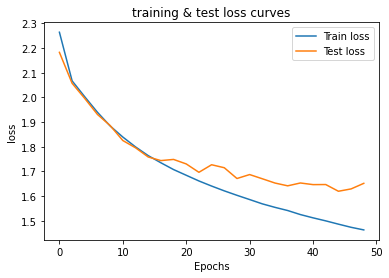

In [ ]:
import numpy as np

#plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_list).numpy()), label ='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_list).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();

#3 layer tanh activation function

In [ ]:
from torch import nn
#building a multiclass classification model
class CifarModel_1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features=hidden_units),
        nn.Tanh(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Tanh(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    x=x.reshape(-1,1024)
    return self.linear_layer_stack(x)

  #create an instance of model and send it to the target device
model_1= CifarModel_1(input_features=1024,
                   output_features=10,
                   hidden_units=100).to(device)
model_1


CifarModel_1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1024, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
#create a loss function and an optimizer for multi-class classification model
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=20
epoch_count=[]
train_loss_list_2=[]
test_loss_list_2=[]

#loop through data
for epoch in range(epochs):
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X_train, y_train =X.to(device), y.to(device)
    #training
    model_1.train()

    #1. forward pass
    y_logits = model_1(X)

    #2.Calculate the loss/acc
    loss = loss_fn(y_logits, y)
    # acc = accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

    train_loss = train_loss + loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step(gradient descent)
    optimizer.step()

  
  ##Testing
  model_1.eval()
  with torch.inference_mode():
    test_loss = 0
    for X, y in test_dataloader:
      X_test, y_test =X.to(device), y.to(device)
    #1. forward pass
      test_logits = model_1(X)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      #2. calculte the loss
      test_loss = test_loss + loss_fn(test_logits, y)

      
      # test_acc= accuracy_fn(y_true=y,
      #                      y_pred=test_logits.argmax(dim=1))
    
  #print out whats hapening
  train_loss = train_loss / len(train_dataloader)
  test_loss = test_loss / len(test_dataloader)
  if epoch%2 == 0 :
   epoch_count.append(epoch)
   #add train loss to the list
   train_loss_list_2.append(train_loss)
   #add test loss to the list
   test_loss_list_2.append(test_loss)

  print(f"Epoch: {epoch} |train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} ")
  




Epoch: 0 |train loss:2.07123 | Test loss:2.01030 
Epoch: 1 |train loss:1.94071 | Test loss:1.90074 
Epoch: 2 |train loss:1.87464 | Test loss:1.83263 
Epoch: 3 |train loss:1.82932 | Test loss:1.81108 
Epoch: 4 |train loss:1.80056 | Test loss:1.80790 
Epoch: 5 |train loss:1.77611 | Test loss:1.86740 
Epoch: 6 |train loss:1.75336 | Test loss:1.78900 
Epoch: 7 |train loss:1.73294 | Test loss:1.86520 
Epoch: 8 |train loss:1.71387 | Test loss:1.84589 
Epoch: 9 |train loss:1.70107 | Test loss:1.77356 
Epoch: 10 |train loss:1.68386 | Test loss:1.71276 
Epoch: 11 |train loss:1.66790 | Test loss:1.75220 
Epoch: 12 |train loss:1.65475 | Test loss:1.72324 
Epoch: 13 |train loss:1.63881 | Test loss:1.76607 
Epoch: 14 |train loss:1.62691 | Test loss:1.72412 
Epoch: 15 |train loss:1.61478 | Test loss:1.74528 
Epoch: 16 |train loss:1.60454 | Test loss:1.69940 
Epoch: 17 |train loss:1.59199 | Test loss:1.69595 
Epoch: 18 |train loss:1.58057 | Test loss:1.72141 
Epoch: 19 |train loss:1.57164 | Test loss

In [ ]:
print(epoch_count)

print(torch.tensor(train_loss_list_2).numpy())

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[2.0712304 1.87464   1.8005558 1.7533582 1.7138658 1.6838566 1.6547526
 1.6269072 1.604544  1.5805678]


In [ ]:
print(torch.tensor(test_loss_list_2).numpy())

[2.010296  1.8326299 1.8079004 1.7890034 1.8458874 1.7127601 1.7232361
 1.7241193 1.6994    1.7214084]


ValueError: ignored

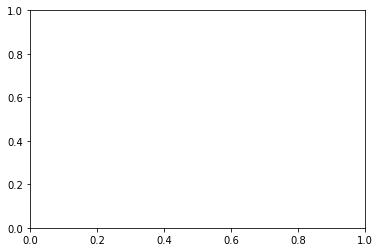

In [ ]:
import numpy as np

#plot loss curves
plt.plot(range(len(train_loss_list)), np.array(torch.tensor(train_loss_list_2).numpy()), label ='Train loss')
plt.plot(range(len(test_loss_list)), np.array(torch.tensor(test_loss_list_2).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();

#3layer model with sigmoid activation function and epochs =200

In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=100
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

#loop through data
for epoch in range(epochs):
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X_train, y_train =X.to(device), y.to(device)
    #training
    model_0.train()

    #1. forward pass
    y_logits = model_0(X)

    #2.Calculate the loss/acc
    loss = loss_fn(y_logits, y)
    # acc = accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

    train_loss = train_loss + loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step(gradient descent)
    optimizer.step()

  
  ##Testing
  model_0.eval()
  with torch.inference_mode():
    test_loss = 0
    for X, y in test_dataloader:
      X_test, y_test =X.to(device), y.to(device)
    #1. forward pass
      test_logits = model_0(X)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      #2. calculte the loss
      test_loss = test_loss + loss_fn(test_logits, y)

      
      # test_acc= accuracy_fn(y_true=y,
      #                      y_pred=test_logits.argmax(dim=1))
    
  #print out whats hapening
  train_loss = train_loss / len(train_dataloader)
  test_loss = test_loss / len(test_dataloader)
  if epoch%2 ==0 :
   epoch_count.append(epoch)
   #add train loss to the list
   train_loss_list.append(train_loss)
   #add test loss to the list
   test_loss_list.append(test_loss)

  print(f"Epoch: {epoch} |train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} ")
  




Epoch: 0 |train loss:2.26363 | Test loss:2.18222 
Epoch: 1 |train loss:2.12688 | Test loss:2.08316 
Epoch: 2 |train loss:2.06689 | Test loss:2.05695 
Epoch: 3 |train loss:2.03662 | Test loss:2.02401 
Epoch: 4 |train loss:2.00223 | Test loss:1.99541 
Epoch: 5 |train loss:1.96885 | Test loss:1.99386 
Epoch: 6 |train loss:1.93962 | Test loss:1.93076 
Epoch: 7 |train loss:1.90956 | Test loss:1.92147 
Epoch: 8 |train loss:1.88425 | Test loss:1.88586 
Epoch: 9 |train loss:1.86158 | Test loss:1.89265 
Epoch: 10 |train loss:1.83936 | Test loss:1.82524 
Epoch: 11 |train loss:1.81966 | Test loss:1.81253 
Epoch: 12 |train loss:1.79951 | Test loss:1.79591 
Epoch: 13 |train loss:1.78249 | Test loss:1.80158 
Epoch: 14 |train loss:1.76420 | Test loss:1.75865 
Epoch: 15 |train loss:1.75116 | Test loss:1.78352 
Epoch: 16 |train loss:1.73521 | Test loss:1.74409 
Epoch: 17 |train loss:1.72219 | Test loss:1.75559 
Epoch: 18 |train loss:1.70772 | Test loss:1.74875 
Epoch: 19 |train loss:1.69587 | Test loss

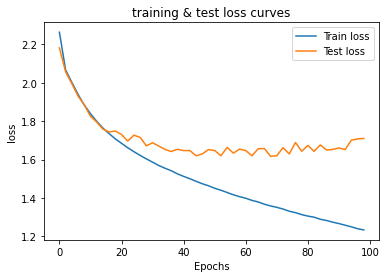

In [ ]:
import numpy as np

#plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_list).numpy()), label ='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_list).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();

# 10 layer model with sigmoid function

In [ ]:
from torch import nn
#building a multiclass classification model
class CifarModel_2(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(), nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    x=x.reshape(-1,1024)
    return self.linear_layer_stack(x)

  #create an instance of model and send it to the target device
model_2= CifarModel_2(input_features=1024,
                   output_features=10,
                   hidden_units=100).to(device)
model_2


CifarModel_2(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1024, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): Sigmoid()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): Sigmoid()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): Sigmoid()
    (18): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
#create a loss function and an optimizer for multi-class classification model
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=50
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

#loop through data
for epoch in range(epochs):
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X_train, y_train =X.to(device), y.to(device)
    #training
    model_2.train()

    #1. forward pass
    y_logits = model_2(X)

    #2.Calculate the loss/acc
    loss = loss_fn(y_logits, y)
    # acc = accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

    train_loss = train_loss + loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step(gradient descent)
    optimizer.step()

  
  ##Testing
  model_2.eval()
  with torch.inference_mode():
    test_loss = 0
    for X, y in test_dataloader:
      X_test, y_test =X.to(device), y.to(device)
    #1. forward pass
      test_logits = model_2(X)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      #2. calculte the loss
      test_loss = test_loss + loss_fn(test_logits, y)

      
      # test_acc= accuracy_fn(y_true=y,
      #                      y_pred=test_logits.argmax(dim=1))
    
  #print out whats hapening
  train_loss = train_loss / len(train_dataloader)
  test_loss = test_loss / len(test_dataloader)
  if epoch%2 ==0 :
   epoch_count.append(epoch)
   #add train loss to the list
   train_loss_list.append(train_loss)
   #add test loss to the list
   test_loss_list.append(test_loss)

  print(f"Epoch: {epoch} |train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} ")
  




Epoch: 0 |train loss:2.31835 | Test loss:2.31030 
Epoch: 1 |train loss:2.30956 | Test loss:2.30860 
Epoch: 2 |train loss:2.30669 | Test loss:2.30682 
Epoch: 3 |train loss:2.30558 | Test loss:2.30466 
Epoch: 4 |train loss:2.30503 | Test loss:2.30468 
Epoch: 5 |train loss:2.30447 | Test loss:2.30570 
Epoch: 6 |train loss:2.30433 | Test loss:2.30529 
Epoch: 7 |train loss:2.30429 | Test loss:2.30338 
Epoch: 8 |train loss:2.30390 | Test loss:2.30471 
Epoch: 9 |train loss:2.30400 | Test loss:2.30345 
Epoch: 10 |train loss:2.30375 | Test loss:2.30327 
Epoch: 11 |train loss:2.30379 | Test loss:2.30283 
Epoch: 12 |train loss:2.30376 | Test loss:2.30313 
Epoch: 13 |train loss:2.30358 | Test loss:2.30390 
Epoch: 14 |train loss:2.30354 | Test loss:2.30422 
Epoch: 15 |train loss:2.30371 | Test loss:2.30308 
Epoch: 16 |train loss:2.30374 | Test loss:2.30343 
Epoch: 17 |train loss:2.30367 | Test loss:2.30322 
Epoch: 18 |train loss:2.30348 | Test loss:2.30323 
Epoch: 19 |train loss:2.30365 | Test loss

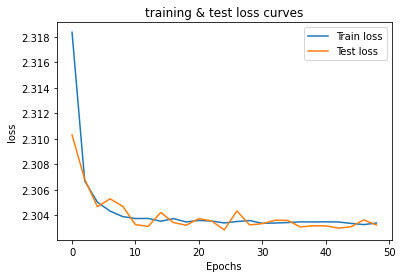

In [ ]:
import numpy as np

#plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_list).numpy()), label ='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_list).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();

# Relu activation Function

In [ ]:
from torch import nn
#building a multiclass classification model
class CifarModel_3(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    x=x.reshape(-1,1024)
    return self.linear_layer_stack(x)

  #create an instance of model and send it to the target device
model_3= CifarModel_3(input_features=1024,
                   output_features=10,
                   hidden_units=100).to(device)
model_3


CifarModel_3(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1024, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
#create a loss function and an optimizer for multi-class classification model
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=20
epoch_count=[]
train_loss_list=[]
test_loss_list=[]

#loop through data
for epoch in range(epochs):
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X_train, y_train =X.to(device), y.to(device)
    #training
    model_3.train()

    #1. forward pass
    y_logits = model_3(X)

    #2.Calculate the loss/acc
    loss = loss_fn(y_logits, y)
    # acc = accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

    train_loss = train_loss + loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step(gradient descent)
    optimizer.step()

  
  ##Testing
  model_3.eval()
  with torch.inference_mode():
    test_loss = 0
    for X, y in test_dataloader:
      X_test, y_test =X.to(device), y.to(device)
    #1. forward pass
      test_logits = model_3(X)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      #2. calculte the loss
      test_loss = test_loss + loss_fn(test_logits, y)

      
      # test_acc= accuracy_fn(y_true=y,
      #                      y_pred=test_logits.argmax(dim=1))
    
  #print out whats hapening
  train_loss = train_loss / len(train_dataloader)
  test_loss = test_loss / len(test_dataloader)
  if epoch%2 ==0 :
   epoch_count.append(epoch)
   #add train loss to the list
   train_loss_list.append(train_loss)
   #add test loss to the list
   test_loss_list.append(test_loss)

  print(f"Epoch: {epoch} |train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} ")
  




Epoch: 0 |train loss:2.13993 | Test loss:2.04977 
Epoch: 1 |train loss:1.97457 | Test loss:1.91700 
Epoch: 2 |train loss:1.90655 | Test loss:1.86601 
Epoch: 3 |train loss:1.85365 | Test loss:1.82005 
Epoch: 4 |train loss:1.80976 | Test loss:1.82066 
Epoch: 5 |train loss:1.77694 | Test loss:1.79921 
Epoch: 6 |train loss:1.74622 | Test loss:1.80788 
Epoch: 7 |train loss:1.71959 | Test loss:1.79550 
Epoch: 8 |train loss:1.69431 | Test loss:1.74476 
Epoch: 9 |train loss:1.67192 | Test loss:1.74760 
Epoch: 10 |train loss:1.65063 | Test loss:1.70059 
Epoch: 11 |train loss:1.63340 | Test loss:1.73965 
Epoch: 12 |train loss:1.61457 | Test loss:1.68499 
Epoch: 13 |train loss:1.59874 | Test loss:1.66824 
Epoch: 14 |train loss:1.58235 | Test loss:1.65060 
Epoch: 15 |train loss:1.57030 | Test loss:1.69872 
Epoch: 16 |train loss:1.55468 | Test loss:1.65427 
Epoch: 17 |train loss:1.54031 | Test loss:1.68207 
Epoch: 18 |train loss:1.53118 | Test loss:1.67479 
Epoch: 19 |train loss:1.51535 | Test loss

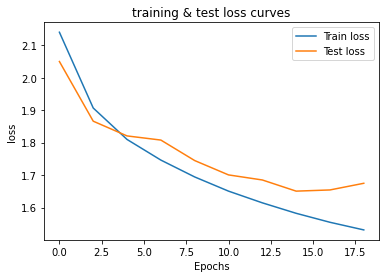

In [ ]:
import numpy as np

#plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_list).numpy()), label ='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_list).numpy()), label='Test loss')
plt.title("training & test loss curves")
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend();